# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from tqdm import tqdm
from IPython.display import display

# Data

In [2]:
data_am = pd.read_csv("df_VEH0124_AM.csv")
data_nz = pd.read_csv("df_VEH0124_NZ.csv")
data = pd.concat([data_am, data_nz], axis=0)

In [3]:
data

,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,LicenceStatus,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,2019,2019,Licensed,5,5,5,6,6,[z],[z],[z],[z],[z]
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,2019,2019,SORN,3,3,3,2,2,[z],[z],[z],[z],[z]
2,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,2018,2018,Licensed,11,12,11,12,12,12,[z],[z],[z],[z]
3,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,2018,2018,SORN,1,0,0,0,0,0,[z],[z],[z],[z]
4,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,2019,2019,Licensed,12,12,12,13,11,[z],[z],[z],[z],[z]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376373,Motorcycles,ZONTES,ZONTES ZT,ZT 350 GK,2022,2022,SORN,1,0,[z],[z],[z],[z],[z],[z],[z],[z]
376374,Motorcycles,ZONTES,ZONTES ZT,ZT 350-T,2023,2023,Licensed,31,[z],[z],[z],[z],[z],[z],[z],[z],[z]
376375,Motorcycles,ZONTES,ZONTES ZT,ZT 350-T,2023,2023,SORN,1,[z],[z],[z],[z],[z],[z],[z],[z],[z]
376376,Motorcycles,ZONTES,ZONTES ZT,ZT 350-T,2022,2022,Licensed,12,14,[z],[z],[z],[z],[z],[z],[z],[z]


In [3]:
data.loc[:,'YearFirstUsed'] = data['YearFirstUsed'].replace('[x]',0)
data['YearFirstUsed'] = data['YearFirstUsed'].astype(int)
data.loc[:,'YearManufacture'] = data['YearManufacture'].replace('[x]',0)
data['YearManufacture'] = data['YearManufacture'].astype(int)
years = ['2023','2022','2021','2020','2019','2018','2017','2016','2015','2014']
data[years] = data[years].replace('[z]',0).astype(int)

In [33]:
data_melt = data.melt(
    id_vars=['BodyType','Make','GenModel','Model','YearFirstUsed','YearManufacture','LicenceStatus'],
    var_name='Year',
    value_name='Count'
)
data_melt['Year'] = data_melt['Year'].astype(int)

In [34]:
data_pivot = data_melt.pivot_table(
    index=['BodyType','Make','GenModel','Model','YearFirstUsed','YearManufacture','Year'],
    columns='LicenceStatus',
    values='Count',
    aggfunc='sum'
).reset_index()
data_pivot['Licensed'] = data_pivot['Licensed'].fillna(0)
data_pivot['SORN'] = data_pivot['SORN'].fillna(0)

In [22]:
data_pivot

LicenceStatus,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,Year,Licensed,SORN
0,Buses and coaches,AIXAM,AIXAM MODEL MISSING,MISSING,2007,2007,2014,6.0,0.0
1,Buses and coaches,AIXAM,AIXAM MODEL MISSING,MISSING,2007,2007,2015,6.0,0.0
2,Buses and coaches,AIXAM,AIXAM MODEL MISSING,MISSING,2007,2007,2016,5.0,0.0
3,Buses and coaches,AIXAM,AIXAM MODEL MISSING,MISSING,2007,2007,2017,2.0,2.0
4,Buses and coaches,AIXAM,AIXAM MODEL MISSING,MISSING,2007,2007,2018,2.0,1.0
...,...,...,...,...,...,...,...,...,...
5442275,Other vehicles,ZONGSHEN,ZONGSHEN MODEL MISSING,MISSING,2018,2018,2019,1.0,0.0
5442276,Other vehicles,ZONGSHEN,ZONGSHEN MODEL MISSING,MISSING,2018,2018,2020,1.0,0.0
5442277,Other vehicles,ZONGSHEN,ZONGSHEN MODEL MISSING,MISSING,2018,2018,2021,1.0,0.0
5442278,Other vehicles,ZONGSHEN,ZONGSHEN MODEL MISSING,MISSING,2018,2018,2022,1.0,0.0


# Initial stats

In [9]:
data_pivot[data_pivot['Model'] == 'MISSING'].sort_values('Licensed', ascending=False)

LicenceStatus,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,Year,Licensed,SORN
5313378,Other vehicles,OTHER BRITISH,OTHER BRITISH MODEL MISSING,MISSING,0,0,2022,53515.0,3540.0
5313379,Other vehicles,OTHER BRITISH,OTHER BRITISH MODEL MISSING,MISSING,0,0,2023,53291.0,3687.0
5313377,Other vehicles,OTHER BRITISH,OTHER BRITISH MODEL MISSING,MISSING,0,0,2021,52836.0,3395.0
5313376,Other vehicles,OTHER BRITISH,OTHER BRITISH MODEL MISSING,MISSING,0,0,2020,52518.0,3242.0
5313375,Other vehicles,OTHER BRITISH,OTHER BRITISH MODEL MISSING,MISSING,0,0,2019,52491.0,2995.0
...,...,...,...,...,...,...,...,...,...
5442232,Other vehicles,ZHENHUA,ZHENHUA MODEL MISSING,MISSING,2015,2015,2016,0.0,1.0
5442268,Other vehicles,ZONGSHEN,ZONGSHEN MODEL MISSING,MISSING,2012,2012,2022,0.0,0.0
5442269,Other vehicles,ZONGSHEN,ZONGSHEN MODEL MISSING,MISSING,2012,2012,2023,0.0,0.0
5442270,Other vehicles,ZONGSHEN,ZONGSHEN MODEL MISSING,MISSING,2018,2018,2014,0.0,0.0


In [10]:
data_pivot.sort_values('Licensed', ascending=False).head()

LicenceStatus,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,Year,Licensed,SORN
903070,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2014,2014,2014,62883.0,131.0
903071,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2014,2014,2015,62048.0,87.0
903074,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2014,2014,2018,61815.0,200.0
903073,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2014,2014,2017,61643.0,186.0
903075,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2014,2014,2019,61479.0,248.0


In [11]:
data_pivot[data_pivot['Year'] == 2023].sort_values('Licensed', ascending=False).head()

LicenceStatus,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,Year,Licensed,SORN
903079,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2014,2014,2023,59497.0,466.0
903059,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2013,2013,2023,57043.0,661.0
5313379,Other vehicles,OTHER BRITISH,OTHER BRITISH MODEL MISSING,MISSING,0,0,2023,53291.0,3687.0
903099,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2015,2015,2023,44551.0,358.0
903039,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2012,2012,2023,41358.0,631.0


In [12]:
# data_pivot.sort_values('SORN', ascending=False).head()
data_pivot[data_pivot['Model'] != 'MISSING'].sort_values('SORN', ascending=False).head()

LicenceStatus,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,Year,Licensed,SORN
3649379,Light goods vehicles,FORD,FORD TRANSIT,TRANSIT 350 LWB,2005,2005,2023,3595.0,3490.0
3649378,Light goods vehicles,FORD,FORD TRANSIT,TRANSIT 350 LWB,2005,2005,2022,4540.0,3314.0
927256,Cars,FORD,FORD FOCUS,FOCUS ZETEC,2001,2001,2020,5041.0,3268.0
1322399,Cars,LAND ROVER,LAND ROVER DISCOVERY,DISCOVERY TDI,1995,1995,2023,450.0,3240.0
1322398,Cars,LAND ROVER,LAND ROVER DISCOVERY,DISCOVERY TDI,1995,1995,2022,537.0,3227.0


In [13]:
# data_pivot[data_pivot['Year'] == 2023].sort_values('SORN', ascending=False).head()
data_pivot[(data_pivot['Year'] == 2023) & (data_pivot['Model'] != 'MISSING')].sort_values('SORN', ascending=False).head()

LicenceStatus,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,Year,Licensed,SORN
3649379,Light goods vehicles,FORD,FORD TRANSIT,TRANSIT 350 LWB,2005,2005,2023,3595.0,3490.0
1322399,Cars,LAND ROVER,LAND ROVER DISCOVERY,DISCOVERY TDI,1995,1995,2023,450.0,3240.0
927259,Cars,FORD,FORD FOCUS,FOCUS ZETEC,2001,2001,2023,1944.0,3122.0
2946899,Cars,VOLKSWAGEN,VOLKSWAGEN GOLF,GOLF GT TDI,2002,2002,2023,3802.0,3118.0
3650259,Light goods vehicles,FORD,FORD TRANSIT,TRANSIT 350 LWB TD,2003,2003,2023,2439.0,3044.0


In [14]:
data_pivot["LS_Ratio"] = data_pivot["Licensed"] / data_pivot["SORN"]
data_pivot["LS_Ratio"] = data_pivot["LS_Ratio"].replace([np.inf, -np.inf], np.nan)
# data_pivot["LS_Ratio"] = data_pivot["LS_Ratio"].fillna(0)

In [71]:
data_pivot[(data_pivot['SORN'] > 1000) & (data_pivot['Model'] != 'MISSING')].sort_values('LS_Ratio', ascending=False)

LicenceStatus,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,Year,Licensed,SORN,LS_Ratio,LS_Ratio_-1,LS_Ratio_-2,LS_Ratio_-3,LS_Ratio_-4,LS_Ratio_Mean_5yr,LS_Ratio_Mean_3yr
904255,Cars,FORD,FORD FIESTA,FIESTA ZETEC CLIMATE,2007,2007,2019,25694.0,1031.0,24.921435,32.431655,42.492424,57.644000,100.465986,51.591100,33.281838
927250,Cars,FORD,FORD FOCUS,FOCUS ZETEC,2001,2001,2014,35653.0,1624.0,21.953818,0.220779,0.256098,0.432099,0.698795,4.712318,7.476898
2793270,Cars,VAUXHALL,VAUXHALL CORSA,CORSA SXI 16V,2003,2003,2014,22007.0,1180.0,18.650000,0.166667,0.250000,0.250000,0.535714,3.970476,6.355556
927281,Cars,FORD,FORD FOCUS,FOCUS ZETEC,2002,2002,2015,27948.0,1506.0,18.557769,34.193856,0.509434,0.660377,0.924528,10.969193,17.753686
904256,Cars,FORD,FORD FIESTA,FIESTA ZETEC CLIMATE,2007,2007,2020,23902.0,1354.0,17.652880,24.921435,32.431655,42.492424,57.644000,35.028479,25.001990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979949,Cars,PEUGEOT,PEUGEOT 205,205 GTI,1989,1989,2023,169.0,1145.0,0.147598,0.164456,0.186047,0.173952,0.187156,0.171842,0.166034
1322369,Cars,LAND ROVER,LAND ROVER DISCOVERY,DISCOVERY TDI,1994,1994,2023,395.0,2702.0,0.146188,0.179821,0.210821,0.227442,0.294653,0.211785,0.178943
1322338,Cars,LAND ROVER,LAND ROVER DISCOVERY,DISCOVERY TDI,1993,1993,2022,296.0,2031.0,0.145741,0.168716,0.189842,0.230578,0.281171,0.203210,0.168100
1322399,Cars,LAND ROVER,LAND ROVER DISCOVERY,DISCOVERY TDI,1995,1995,2023,450.0,3240.0,0.138889,0.166408,0.211838,0.251566,0.301916,0.214124,0.172378


In [16]:
data_pivot_grouped = data_pivot.groupby(['Make','GenModel','Model','YearManufacture'])

for n in [1,2,3,4]:
    data_pivot[f'LS_Ratio_-{n}'] = data_pivot_grouped['LS_Ratio'].shift(n)
    data_pivot[f'LS_Ratio_-{n}'] = data_pivot[f'LS_Ratio_-{n}'].fillna(0)

data_pivot['LS_Ratio_Mean_5yr'] = data_pivot[['LS_Ratio', 'LS_Ratio_-1', 'LS_Ratio_-2', 'LS_Ratio_-3', 'LS_Ratio_-4']].mean(axis=1)
data_pivot['LS_Ratio_Mean_3yr'] = data_pivot[['LS_Ratio', 'LS_Ratio_-1', 'LS_Ratio_-2']].mean(axis=1)

In [17]:
data_pivot[(data_pivot['Model'] == 'FIESTA ZETEC') & (data_pivot['YearManufacture'] == 2014) & (data_pivot['Year'] == 2023)]

LicenceStatus,BodyType,Make,GenModel,Model,YearFirstUsed,YearManufacture,Year,Licensed,SORN,LS_Ratio,LS_Ratio_-1,LS_Ratio_-2,LS_Ratio_-3,LS_Ratio_-4,LS_Ratio_Mean_5yr,LS_Ratio_Mean_3yr
902579,Cars,FORD,FORD FIESTA,FIESTA ZETEC,0,2014,2023,734.0,16.0,45.875000,125.833333,95.250000,126.833333,255.666667,129.891667,88.986111
903079,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2014,2014,2023,59497.0,466.0,127.675966,156.425974,178.735294,197.197411,247.899194,181.586768,154.279078
903089,Cars,FORD,FORD FIESTA,FIESTA ZETEC,2015,2014,2023,1.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3606239,Light goods vehicles,FORD,FORD FIESTA,FIESTA ZETEC,2014,2014,2023,2.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5091499,Other vehicles,FORD,FORD FIESTA,FIESTA ZETEC,2014,2014,2023,1.0,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Plotting

In [39]:
def plots(df):
    car_data_grouped_by_year = df[['Year', 'Licensed', 'SORN']]
    car_data_grouped_by_year = car_data_grouped_by_year.groupby('Year').sum()

    fig, ax1 = plt.subplots(figsize=(10,6))
    ax2 = ax1.twinx()
    plt.title("Count of licensed and SORN vehicles, and ratio, per year")

    sns.lineplot(data=car_data_grouped_by_year, x="Year", y="Licensed", ax=ax1, label="Licensed", color="b", errorbar=None, estimator=None)
    sns.lineplot(data=car_data_grouped_by_year, x="Year", y="SORN", ax=ax1, label="SORN", color="g", errorbar=None, estimator=None)
    ax1.set_ylabel("Licensed & SORN", color="black")
    ax1.set_xlabel("Year")

    car_data_grouped_by_year['LS_Ratio_Group'] = car_data_grouped_by_year['Licensed'] / car_data_grouped_by_year['SORN']
    
    sns.lineplot(data=car_data_grouped_by_year, x="Year", y="LS_Ratio_Group", ax=ax2, label="Ratio", color="r", errorbar=None)
    ax2.axhline(1, color='black', linewidth=0.8, linestyle='--')
    ax2.set_ylabel("Licensed to SORN Ratio", color="red")

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    plt.legend(lines, labels, loc='best')

    plt.show()

    display(car_data_grouped_by_year)

    car_data_grouped_by_manu_year = df[df['Year'] == 2023][['YearManufacture','Licensed']].groupby('YearManufacture').sum()

    plt.figure(figsize=(11,6))
    plt.title("Count of licensed cars in 2023 per year of manufacture")
    sns.barplot(car_data_grouped_by_manu_year, x=car_data_grouped_by_manu_year.index, y='Licensed')
    plt.xlabel("Year of Manufacture")
    plt.xticks(rotation=45)
    plt.show()
    
    display(car_data_grouped_by_manu_year)

In [32]:
model_data_pivot.Year

894920    2014
894921    2015
894922    2016
894923    2017
894924    2018
          ... 
895045    2019
895046    2020
895047    2021
895048    2022
895049    2023
Name: Year, Length: 130, dtype: object

# Search

In [35]:
search_col = 'Model'
search_phrase = r'FIESTA ST'

model_search_data = data[data[search_col].str.contains(search_phrase, case=False, na=False)]
results = model_search_data[search_col].unique()

print(model_search_data[search_col].nunique())
for i, c in enumerate(results):
    print(f"{i}: {c}")

58
0: FIESTA ST
1: FIESTA ST 500
2: FIESTA ST EDITION TURBO
3: FIESTA ST PERFORMANCE ED TURBO
4: FIESTA ST TURBO
5: FIESTA ST-1 TURBO
6: FIESTA ST-2 TURBO
7: FIESTA ST-3 TURBO
8: FIESTA ST-LINE
9: FIESTA ST-LINE BLACK EDITION
10: FIESTA ST-LINE ED TRBO MHEV A
11: FIESTA ST-LINE EDITION T MHEV
12: FIESTA ST-LINE EDITION TDCI
13: FIESTA ST-LINE EDITION TURBO
14: FIESTA ST-LINE EDITION TURBO A
15: FIESTA ST-LINE RED EDITION
16: FIESTA ST-LINE TDCI
17: FIESTA ST-LINE TURBO
18: FIESTA ST-LINE TURBO AUTO
19: FIESTA ST-LINE TURBO MHEV
20: FIESTA ST-LINE TURBO MHEV AUTO
21: FIESTA ST-LINE VIGNALE T MHEV
22: FIESTA ST-LINE VIGNALE TURBO
23: FIESTA ST-LINE X ED T MHEV A
24: FIESTA ST-LINE X ED TURBO AUTO
25: FIESTA ST-LINE X EDITION TDCI
26: FIESTA ST-LINE X EDITION TURBO
27: FIESTA ST-LINE X TDCI
28: FIESTA ST-LINE X TURBO
29: FIESTA ST-LINE X TURBO AUTO
30: FIESTA ST-LINE X TURBO MHEV A
31: FIESTA ST-LNE VIGNALE T MHEV A
32: FIESTA ST200
33: FIESTA STLINE X EDITION T MHEV
34: FIESTA STUDIO
35:

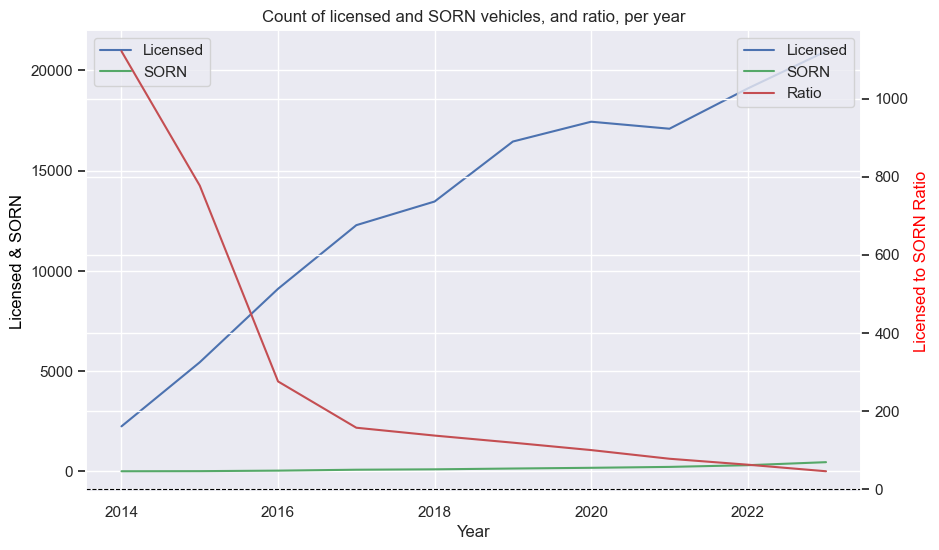

LicenceStatus,Licensed,SORN,LS_Ratio_Group
Year,,,
2014,2242.0,2.0,1121.000000
2015,5440.0,7.0,777.142857
2016,9106.0,33.0,275.939394
2017,12281.0,78.0,157.448718
2018,13461.0,98.0,137.357143
2019,16454.0,138.0,119.231884
2020,17443.0,174.0,100.247126
2021,17093.0,219.0,78.050228
2022,19102.0,304.0,62.835526


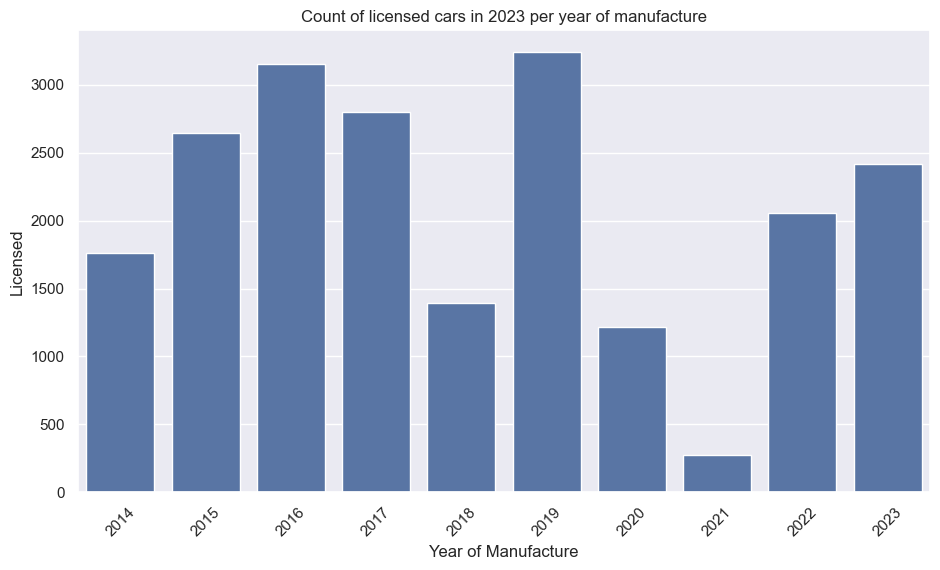

LicenceStatus,Licensed
YearManufacture,
2014,1759.0
2015,2647.0
2016,3154.0
2017,2803.0
2018,1392.0
2019,3239.0
2020,1215.0
2021,276.0
2022,2055.0


In [40]:
choice = 7
model_data = data[data[search_col] == results[choice]]
model_data_pivot = data_pivot[data_pivot[search_col] == results[choice]]
model_data_pivot.head()
plots(model_data_pivot)

# Stats

In [26]:
display(
    data_pivot[(data_pivot['BodyType'] != 'Motorcycles') & (data_pivot['BodyType'] != 'Light goods vehicles') & (data_pivot['BodyType'] != 'Other vehicles') & (data_pivot['YearManufacture'] < 2000) & (data_pivot['Model'] != 'MISSING') & (data_pivot['Licensed'] > 100) & (data_pivot['Year'] == 2023)]
    .drop(['BodyType','Year','LS_Ratio_-1','LS_Ratio_-2','LS_Ratio_-3','LS_Ratio_-4'], axis=1)
    .sort_values('LS_Ratio_Mean_5yr', ascending=False)
    .head(5)
)

display(
    data_pivot[(data_pivot['BodyType'] != 'Motorcycles') & (data_pivot['BodyType'] != 'Light goods vehicles') & (data_pivot['BodyType'] != 'Other vehicles') & (data_pivot['YearManufacture'] < 2000) & (data_pivot['Model'] != 'MISSING') & (data_pivot['Licensed'] > 100) & (data_pivot['Year'] == 2023)]
    .drop(['BodyType','GenModel','YearFirstUsed','YearManufacture','Year','LS_Ratio_-1','LS_Ratio_-2','LS_Ratio_-3','LS_Ratio_-4'], axis=1)
    .groupby('Model', as_index=False)
    .agg({'Make':'first', 'Licensed':'sum', 'SORN':'sum', 'LS_Ratio':'mean', 'LS_Ratio_Mean_5yr':'mean', 'LS_Ratio_Mean_3yr':'mean'})
    .sort_values('LS_Ratio_Mean_5yr', ascending=False)
    .head(5)
)

display(
    data_pivot[(data_pivot['BodyType'] != 'Motorcycles') & (data_pivot['BodyType'] != 'Light goods vehicles') & (data_pivot['BodyType'] != 'Other vehicles') & (data_pivot['YearManufacture'] < 2000) & (data_pivot['Model'] != 'MISSING') & (data_pivot['Licensed'] > 100) & (data_pivot['Year'] == 2023)]
    .drop(['Model','YearFirstUsed','YearManufacture','Year','LS_Ratio_-1','LS_Ratio_-2','LS_Ratio_-3','LS_Ratio_-4'], axis=1)
    .groupby('GenModel', as_index=False)
    .agg({'Make':'first', 'Licensed':'sum', 'SORN':'sum', 'LS_Ratio_Mean_5yr':'mean', 'LS_Ratio_Mean_3yr':'mean'})
    .sort_values('LS_Ratio_Mean_5yr', ascending=False)
    .head(5)
)

LicenceStatus,Make,GenModel,Model,YearFirstUsed,YearManufacture,Licensed,SORN,LS_Ratio,LS_Ratio_Mean_5yr,LS_Ratio_Mean_3yr
1723709,MG,MG MGB,B,1981,1980,159.0,5.0,31.800000,48.960000,80.600000
1725259,MG,MG MGB,B GT,1981,1980,164.0,5.0,32.800000,33.526667,55.544444
1723289,MG,MG MGB,B,1974,1973,101.0,8.0,12.625000,15.925000,15.652778
1722969,MG,MG MGB,B,1966,1966,113.0,13.0,8.692308,9.127772,9.193473
1722029,MG,MG MGA,A,1959,0,171.0,22.0,7.772727,8.135448,7.689065


LicenceStatus,Model,Make,Licensed,SORN,LS_Ratio,LS_Ratio_Mean_5yr,LS_Ratio_Mean_3yr
196,MINI MINOR,MORRIS,108.0,15.0,7.200000,6.695833,6.986111
263,TR2,TRIUMPH,136.0,22.0,6.181818,6.093074,6.139971
50,A,MG,1042.0,192.0,5.757499,5.948549,5.850808
209,MUSTANG GT,FORD,210.0,35.0,6.238095,5.926916,6.240947
63,B,MG,12297.0,4302.0,4.823928,5.338588,6.451258


LicenceStatus,GenModel,Make,Licensed,SORN,LS_Ratio_Mean_5yr,LS_Ratio_Mean_3yr
109,TRIUMPH TR2,TRIUMPH,136.0,22.0,6.093074,6.139971
68,MG MGA,MG,1042.0,192.0,5.948549,5.850808
30,FORD MUSTANG,FORD,325.0,64.0,5.644761,5.678685
112,TRIUMPH TR5,TRIUMPH,298.0,55.0,5.267664,5.602357
110,TRIUMPH TR3,TRIUMPH,122.0,28.0,5.016905,4.644841


# Phoenix 🐦‍🔥

In [27]:
phoenix_data = data_pivot[(data_pivot['YearManufacture'] < 2000) & (data_pivot['Model'] != 'MISSING')].sort_values('Make', ascending=True)

In [145]:
switch = 1  # set to 1 to enable, set to 0 to disable
min_licensed_lt = 999999  # set very high to "deactivate"
now_licensed_gt = 400  # set to 0 to "deactivate"
now_licensed_lt = 2000  # set very high to "deactivate"
ls_ratio_multiplier = 0  # set to 0 to "deactivate"
ls_ratio_lt = 99999  # set very high to "deactivate"
ls_ratio_gt = 0  # set to 0 to "deactivate"
ls_ratio_2023_gt = 0  # set to 0 to "deactivate"

phoenixes = []

for (make, genmodel, model, yearmanufacture), model_data in phoenix_data[['Make','GenModel','Model','YearManufacture','Year','Licensed','SORN']].groupby(['Make','GenModel','Model','YearManufacture']):
    model_data_grouped = model_data.groupby(['Make','GenModel','Model','YearManufacture','Year'], as_index=False).sum()
    model_data_grouped["LS_Ratio_Group"] = model_data_grouped["Licensed"] / model_data_grouped["SORN"]
    model_data_grouped["LS_Ratio_Group"] = model_data_grouped["LS_Ratio_Group"].replace([np.inf, -np.inf], np.nan)
    model_data_grouped['Switch'] = (model_data_grouped['LS_Ratio_Group'].transform(lambda x: (x > 1) & (x.shift(1) < 1)))
    if ((model_data_grouped['Switch'].sum() >= switch) 
        & (model_data_grouped['Licensed'] <= min_licensed_lt).any() 
        & (model_data_grouped[model_data_grouped['Year']==2023]['Licensed'] >= now_licensed_gt).any() 
        & (model_data_grouped[model_data_grouped['Year']==2023]['Licensed'] <= now_licensed_lt).any() 
        & (model_data_grouped['LS_Ratio_Group'][9] > (ls_ratio_multiplier * model_data_grouped['LS_Ratio_Group'].mean()))
        & (model_data_grouped['LS_Ratio_Group'] <= ls_ratio_lt).any()
        & (model_data_grouped['LS_Ratio_Group'] >= ls_ratio_gt).any()
        & (model_data_grouped['LS_Ratio_Group'][9] >= ls_ratio_2023_gt).any()
        ):
            print(f"🐦‍🔥? {make} / {genmodel} / {model} / {yearmanufacture}")
            phoenixes.append({f"{make} / {genmodel} / {model} / {yearmanufacture}" : model_data_grouped})
            # display(model_data_grouped)

🐦‍🔥? FORD / FORD ESCORT / ESCORT / 0
🐦‍🔥? LAND ROVER / LAND ROVER 109 / 109-4 CYL / 0
🐦‍🔥? LAND ROVER / LAND ROVER 88 / 88-4 CYL / 1977
🐦‍🔥? LAND ROVER / LAND ROVER 90 / 90 4C SW DT DIESEL / 1989
🐦‍🔥? MG / MG MGB / B / 1975
🐦‍🔥? MG / MG MGB / B / 1976
🐦‍🔥? MG / MG MGB / B / 1977
🐦‍🔥? MG / MG MGB / B / 1978
🐦‍🔥? MG / MG MGB / B / 1979
🐦‍🔥? MG / MG MGB / B / 1980
🐦‍🔥? MG / MG MGB / B GT / 1975
🐦‍🔥? MG / MG MGB / B GT / 1977
🐦‍🔥? MG / MG MGB / B GT / 1978
🐦‍🔥? MG / MG MGB / B GT / 1980
🐦‍🔥? MG / MG MIDGET / MIDGET 1500 / 1976
🐦‍🔥? MG / MG MIDGET / MIDGET 1500 / 1977
🐦‍🔥? MG / MG MIDGET / MIDGET 1500 / 1978
🐦‍🔥? MG / MG MIDGET / MIDGET 1500 / 1979
🐦‍🔥? TRIUMPH / TRIUMPH GT6 / GT6 / 0
🐦‍🔥? TRIUMPH / TRIUMPH SPITFIRE / SPITFIRE / 0
🐦‍🔥? TRIUMPH / TRIUMPH SPITFIRE / SPITFIRE 1500 / 1979
🐦‍🔥? TRIUMPH / TRIUMPH STAG / STAG / 1976
🐦‍🔥? TRIUMPH / TRIUMPH STAG / STAG AUTO / 1976
🐦‍🔥? TRIUMPH / TRIUMPH TR7 / TR7 CONVERTIBLE / 1980
🐦‍🔥? VOLKSWAGEN / VOLKSWAGEN 1200 / 1200 / 0
🐦‍🔥? VOLKSWAGEN / VOLKS

LicenceStatus,Make,GenModel,Model,YearManufacture,Year,Licensed,SORN,LS_Ratio_Group,Switch
0,TALBOT,TALBOT SUNBEAM,SUNBEAM LOTUS,1981,2014,13.0,52.0,0.250000,False
1,TALBOT,TALBOT SUNBEAM,SUNBEAM LOTUS,1981,2015,14.0,51.0,0.274510,False
2,TALBOT,TALBOT SUNBEAM,SUNBEAM LOTUS,1981,2016,14.0,58.0,0.241379,False
3,TALBOT,TALBOT SUNBEAM,SUNBEAM LOTUS,1981,2017,13.0,65.0,0.200000,False
4,TALBOT,TALBOT SUNBEAM,SUNBEAM LOTUS,1981,2018,9.0,68.0,0.132353,False
5,TALBOT,TALBOT SUNBEAM,SUNBEAM LOTUS,1981,2019,11.0,70.0,0.157143,False
6,TALBOT,TALBOT SUNBEAM,SUNBEAM LOTUS,1981,2020,9.0,71.0,0.126761,False
7,TALBOT,TALBOT SUNBEAM,SUNBEAM LOTUS,1981,2021,11.0,73.0,0.150685,False
8,TALBOT,TALBOT SUNBEAM,SUNBEAM LOTUS,1981,2022,48.0,59.0,0.813559,False
9,TALBOT,TALBOT SUNBEAM,SUNBEAM LOTUS,1981,2023,60.0,54.0,1.111111,True


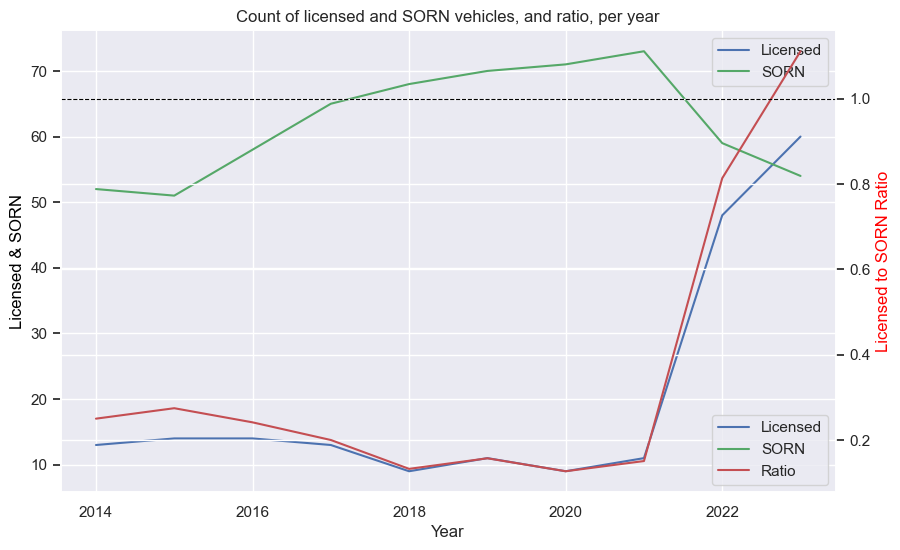

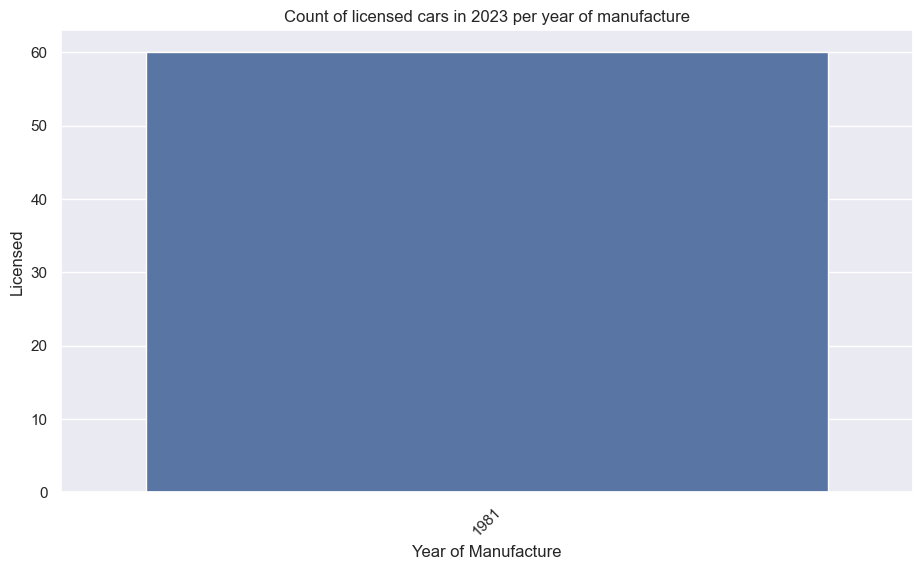

In [73]:
search_phrase = r'TALBOT / TALBOT SUNBEAM / SUNBEAM LOTUS / 1981'
phoenix_car = next((item for item in phoenixes if search_phrase in item), None)[search_phrase]
display(phoenix_car)
plots(phoenix_car)

# Chosen cars

In [ ]:
rscosworths = data_pivot[(data_pivot.Model == 'ESCORT RS COSWORTH')]
plots(rscosworths)

In [ ]:
p911s = data_pivot[(data_pivot.GenModel == 'PORSCHE 911') & (data_pivot.YearManufacture < 1998)]
plots(p911s)

In [ ]:
golfs = data_pivot[(data_pivot.Model.str.contains('GOLF GTI')) & (data_pivot.YearManufacture < 1983)]
plots(golfs)

In [ ]:
elises = data_pivot[(data_pivot.GenModel == 'LOTUS ELISE') & (data_pivot.YearManufacture < 2002)]
plots(elises)

In [ ]:
etypes = data_pivot[(data_pivot.Make == 'JAGUAR') & ((data_pivot.Model == '2+2 E TYPE') | (data_pivot.Model == 'OPEN E TYPE'))]
plots(etypes)

In [ ]:
db5s = data_pivot[(data_pivot.Make == 'ASTON MARTIN') & (data_pivot.Model == 'DB5')]
plots(db5s)

In [ ]:
pug_205gtis = data_pivot[data_pivot.Model == '205 GTI']
plots(pug_205gtis)

In [ ]:
mb_190es = data_pivot[(data_pivot.Model == '190E 2.3 16') | (data_pivot.Model == '190E 2.5 16')]
plots(mb_190es)

In [ ]:
e30_m3s = data_pivot[(data_pivot.Make == 'BMW') & (data_pivot.Model == 'M3') & (data_pivot.YearManufacture < 1992)]
plots(e30_m3s)

In [ ]:
supras = data_pivot[(data_pivot.Make == 'TOYOTA') & (data_pivot.Model == 'SUPRA') & (data_pivot.YearManufacture > 1992) & (data_pivot.YearManufacture < 2003)]
plots(supras)

In [ ]:
rx7s = data_pivot[(data_pivot.Make == 'MAZDA') & (data_pivot.GenModel == 'MAZDA RX-7')]
plots(rx7s)

# Helper

In [138]:
# with pd.option_context('display.max_rows', None):
#     display(car_data)